In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import pandas as pd
from pandas import read_csv

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn import set_config

from sklearn.metrics import  ConfusionMatrixDisplay,\
                  classification_report,  RocCurveDisplay, PrecisionRecallDisplay,\
                    accuracy_score, f1_score, precision_score, recall_score


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB, GaussianNB, CategoricalNB, MultinomialNB

from sklearn.model_selection import GridSearchCV

from yellowbrick.target.feature_correlation import feature_correlation
from yellowbrick.classifier import precision_recall_curve

import warnings

set_config(display='text')
warnings.filterwarnings('ignore')
plt.rcParams.update({'font.size': 16})
pd.set_option('display.precision', 3)

La primera tarea es obtener los datos. Esto se puede hacer usando la función de scikit-learn
fetch_olivetti_faces(return_X_y=True) que devolverá dos matrices de datos, una para los datos de entrada y otra para las etiquetas. Deberás dividir los datos en un conjunto
de entrenamiento y test (70 %/30 %) y normalizar los datos para que estén en el rango [0-1]
(simplemente divide los datos por el valor máximo de los píxeles).


In [3]:
from sklearn.datasets import fetch_olivetti_faces
X, y = fetch_olivetti_faces(return_X_y=True)

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Transforma las etiquetas del problema en una matriz con codificación one-hot utilizando
la clase scikit learn OneHotEncoder (sin salida dispersa). Ahora tenemos el conjunto de
datos listo para entrenar.

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
yohe_train = ohe.fit_transform(y_train.reshape(-1, 1))
yohe_test = ohe.transform(y_test.reshape(-1, 1))

Aplica el PCA a las imágenes y
genera dos conjuntos de datos utilizando los primeros 10 y 20 componentes (no hace falta
que estandarices los datos).

In [ ]:
from sklearn.decomposition import PCA
myPCA = PCA().fit(X_train);

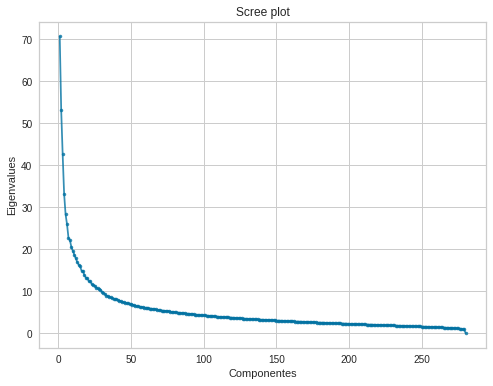

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.singular_values_ )+1),myPCA.singular_values_ ,alpha=0.8,marker='.')
y_label = plt.ylabel('Eigenvalues')
x_label = plt.xlabel('Componentes')
plt.title('Scree plot')
plt.show()

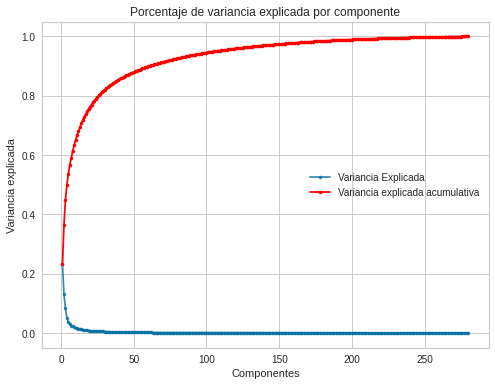

In [ ]:
fig = plt.figure(figsize=(8,6))
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),myPCA.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variancia Explicada")
y_label = plt.ylabel('Variancia explicada')
x_label = plt.xlabel('Componentes')
plt.plot(range(1,len(myPCA.explained_variance_ratio_ )+1),
         np.cumsum(myPCA.explained_variance_ratio_),
         c='red',marker='.',
         label="Variancia explicada acumulativa")
plt.legend()
plt.title('Porcentaje de variancia explicada por componente')
plt.show()

In [ ]:
PCAtrain10 = myPCA.transform(X_train)[:, :10]
PCAtrain20 = myPCA.transform(X_train)[:, :20]

PCAtest10 = myPCA.transform(X_test)[:, :10]
PCAtest20 = myPCA.transform(X_test)[:, :20]

Entrena el perceptrón con los dos conjuntos de datos explorando tamaños para la capa
oculta de 25 a 100 neuronas en pasos de 25 en 25 usando lotes de 16 ejemplos y 200
épocas. Calcula el acierto de los modelos. Para ello puedes utilizar el método predict del
objeto modelo. Tendrás que transformar el vector de predicciones del softmax a etiquetas
empleando la función np.argmax. Dado que no hacemos validación cruzada nos fijaremos
en el acierto sobre los datos de entrenamiento y de test. Escoge el modelo que tenga el mejor
resultado. ¿Un número mayor de neuronas en la red corresponde con un mejor modelo?
¿Por qué?

In [6]:
BATCH_SIZE = 16
EPOCHS = 200

In [ ]:
for NEURONS in range(25, 101, 25):
  model = keras.Sequential()
  model.add(keras.Input(shape=(10,)))
  model.add(keras.layers.Dense(NEURONS, activation="relu"))
  model.add(keras.layers.Dense(40, activation="softmax"))
  model.compile(optimizer=keras.optimizers.SGD(),
  loss=tf.keras.losses.CategoricalCrossentropy())
  model.fit(PCAtrain10,yohe_train,batch_size=BATCH_SIZE,
  epochs=EPOCHS,verbose=False)
  pred=model.predict(PCAtrain10)
  pred_label = np.argmax(pred, axis=1)
  print("MODEL WITH "+str(NEURONS)+" NEURONS (train)")
  print(classification_report(pred_label, y_train,output_dict = True)['accuracy'])
  pred=model.predict(PCAtest10)
  pred_label = np.argmax(pred, axis=1)
  print("MODEL WITH "+str(NEURONS)+" NEURONS (test)")
  print(classification_report(pred_label, y_test,output_dict = True)['accuracy'])

9/9 [==============================] - 0s 2ms/step
MODEL WITH 25 NEURONS (train)
0.975
4/4 [==============================] - 0s 2ms/step
MODEL WITH 25 NEURONS (test)
0.7916666666666666
9/9 [==============================] - 0s 2ms/step
MODEL WITH 50 NEURONS (train)
0.9964285714285714
4/4 [==============================] - 0s 2ms/step
MODEL WITH 50 NEURONS (test)
0.8333333333333334
9/9 [==============================] - 0s 2ms/step
MODEL WITH 75 NEURONS (train)
0.9928571428571429
4/4 [==============================] - 0s 2ms/step
MODEL WITH 75 NEURONS (test)
0.7916666666666666
9/9 [==============================] - 0s 3ms/step
MODEL WITH 100 NEURONS (train)
0.9964285714285714
4/4 [==============================] - 0s 2ms/step
MODEL WITH 100 NEURONS (test)
0.825


In [ ]:
for NEURONS in range(25, 101, 25):
  model = keras.Sequential()
  model.add(keras.Input(shape=(20,)))
  model.add(keras.layers.Dense(NEURONS, activation="relu"))
  model.add(keras.layers.Dense(40, activation="softmax"))
  model.compile(optimizer=keras.optimizers.SGD(),
  loss=tf.keras.losses.CategoricalCrossentropy())
  model.fit(PCAtrain20,yohe_train,batch_size=BATCH_SIZE,
  epochs=EPOCHS,verbose=False)
  pred=model.predict(PCAtrain20)
  pred_label = np.argmax(pred, axis=1)
  print("MODEL WITH "+str(NEURONS)+" NEURONS (train)")
  print(classification_report(pred_label, y_train,output_dict = True)['accuracy'])
  pred=model.predict(PCAtest20)
  pred_label = np.argmax(pred, axis=1)
  print("MODEL WITH "+str(NEURONS)+" NEURONS (test)")
  print(classification_report(pred_label, y_test,output_dict = True)['accuracy'])

9/9 [==============================] - 0s 2ms/step
MODEL WITH 25 NEURONS (train)
1.0
4/4 [==============================] - 0s 2ms/step
MODEL WITH 25 NEURONS (test)
0.8833333333333333
9/9 [==============================] - 0s 2ms/step
MODEL WITH 50 NEURONS (train)
1.0
4/4 [==============================] - 0s 2ms/step
MODEL WITH 50 NEURONS (test)
0.8583333333333333
9/9 [==============================] - 0s 2ms/step
MODEL WITH 75 NEURONS (train)
1.0
4/4 [==============================] - 0s 2ms/step
MODEL WITH 75 NEURONS (test)
0.9083333333333333
9/9 [==============================] - 0s 2ms/step
MODEL WITH 100 NEURONS (train)
1.0
4/4 [==============================] - 0s 2ms/step
MODEL WITH 100 NEURONS (test)
0.9166666666666666


El modelo que mejor funciona es el que utiliza 20 componentes del PCA y tiene 100 neuronas. Aunque en este caso parece que la tendencia es que a más neuronas funciona mejor, no siempre más neuronas implica mejor funcionamiento. Un número demmasiado pequeño de neuronas producirá underfitting, pero uno demasiado grande producirá overfitting, lo cual tampoco es deseable.

Una alternativa a los MLP son las capas convolucionales. Como hemos visto en clase, se
trata de redes neuronales inspiradas en el funcionamiento de la corteza visual y especializadas en problemas de visión. Repasa lo que vimos en teoría para entender como funcionan.
Vamos a utilizar una capa convolucional para clasificar el conjunto de datos original. Como la entrada debe ser una matriz cuadrada, tendremos que transformar la forma de la
matriz entrada. Además, las capas convolucionales se usan para procesar imágenes en color, por lo que asumen que cada imagen es una matriz 3D, la tercera dimensión es para los
canales de color. En este caso, las imágenes son en escala de grises, por lo que tendremos que simular que tenemos una dimensión adicional. Podemos usar numpy para transformar
los datos de entrenamiento y test usando la función reshape (X.reshape(-1,64,64,1)),
esto dará como resultado una matriz 4D, la primera dimensión son los ejemplos, las otras
tres son la imagen de cada ejemplo.
En este caso vamos a explorar el número de neuronas (filters) de la capa convolucional
fijando el paso de las convoluciones (stride) a 1 y el tamaño del kernel de las convoluciones
a 3. Experimenta con un número de neuronas de 1 a 10.

In [ ]:
X_train_square = X_train.reshape(-1, 64, 64, 1)
X_test_square = X_test.reshape(-1, 64, 64, 1)

In [ ]:
for NEURONS in range(1, 11, 1):
  model = keras.Sequential()
  model.add(keras.Input(shape=(64,64,1,)))
  model.add(keras.layers.Conv2D(filters=NEURONS, kernel_size=3,
  strides=1, activation="relu"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(40, activation="softmax"))
  model.compile(optimizer=keras.optimizers.SGD(),
  loss=tf.keras.losses.CategoricalCrossentropy())
  model.fit(X_train_square,yohe_train,batch_size=BATCH_SIZE,
  epochs=EPOCHS,verbose=False)
  pred=model.predict(X_train_square)
  pred_label = np.argmax(pred, axis=1)
  print("MODEL WITH "+str(NEURONS)+" NEURONS (train)")
  print(classification_report(pred_label, y_train,output_dict = True)['accuracy'])
  pred=model.predict(X_test_square)
  pred_label = np.argmax(pred, axis=1)
  print("MODEL WITH "+str(NEURONS)+" NEURONS (test)")
  print(classification_report(pred_label, y_test,output_dict = True)['accuracy'])

9/9 [==============================] - 0s 5ms/step
MODEL WITH 1 NEURONS (train)
1.0
4/4 [==============================] - 0s 3ms/step
MODEL WITH 1 NEURONS (test)
0.9166666666666666
9/9 [==============================] - 0s 5ms/step
MODEL WITH 2 NEURONS (train)
1.0
4/4 [==============================] - 0s 3ms/step
MODEL WITH 2 NEURONS (test)
0.9583333333333334
9/9 [==============================] - 0s 4ms/step
MODEL WITH 3 NEURONS (train)
1.0
4/4 [==============================] - 0s 3ms/step
MODEL WITH 3 NEURONS (test)
0.925
9/9 [==============================] - 0s 4ms/step
MODEL WITH 4 NEURONS (train)
1.0
4/4 [==============================] - 0s 3ms/step
MODEL WITH 4 NEURONS (test)
0.9583333333333334
9/9 [==============================] - 0s 4ms/step
MODEL WITH 5 NEURONS (train)
1.0
4/4 [==============================] - 0s 3ms/step
MODEL WITH 5 NEURONS (test)
0.9583333333333334
9/9 [==============================] - 0s 4ms/step
MODEL WITH 6 NEURONS (train)
1.0
4/4 [==============

Calcula el acierto igual que en el apartado anterior y escoge el mejor modelo. Escoge cuál
de los dos modelos (este y el del apartado anterior) te parece mejor.

El mejor modelo es el que tiene 5 neuronas. Me parece mejor este último modelo que el anterior, ya que al utilizar la convolución estamos esencialmente reduciendo detalle de la imagen, y así evitando overfitting, además de que la accuracy en general es superior.

El método count_params() de la clase Model calcula cuántos parámetros tiene la red
y el método summary calcula los parámetros por capa. Dado cómo se definen las capas
convolucionales y las densas, explica cómo se calculan los tamaños y la cantidad de parámetros de las capas en las redes. Compara y comenta los resultados que se obtienen en
los dos tipos de redes que has definido y las ventajas/inconvenientes que tienen respecto a
su número de parámetros. ¿Cuáles habrían sido los tamaños de las capas de la red MLP si
hubiéramos usado los datos en su forma original?

In [ ]:
NEURONS = 75
model1 = keras.Sequential()
model1.add(keras.Input(shape=(20,)))
model1.add(keras.layers.Dense(NEURONS, activation="relu"))
model1.add(keras.layers.Dense(40, activation="softmax"))
model1.compile(optimizer=keras.optimizers.SGD(),
loss=tf.keras.losses.CategoricalCrossentropy())
model1.fit(PCAtrain20,yohe_train,batch_size=BATCH_SIZE,
epochs=EPOCHS,verbose=False)

In [ ]:
NEURONS = 5
model2 = keras.Sequential()
model2.add(keras.Input(shape=(64,64,1,)))
model2.add(keras.layers.Conv2D(filters=NEURONS, kernel_size=3,
strides=1, activation="relu"))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(40, activation="softmax"))
model2.compile(optimizer=keras.optimizers.SGD(),
loss=tf.keras.losses.CategoricalCrossentropy())
model2.fit(X_train_square,yohe_train,batch_size=BATCH_SIZE,
epochs=EPOCHS,verbose=False)

In [ ]:
model1.count_params()

4615

In [ ]:
model1.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 75)                1575      
                                                                 
 dense_31 (Dense)            (None, 40)                3040      
                                                                 
Total params: 4,615
Trainable params: 4,615
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.count_params()

768890

In [ ]:
model2.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 5)         50        
                                                                 
 flatten_12 (Flatten)        (None, 19220)             0         
                                                                 
 dense_32 (Dense)            (None, 40)                768840    
                                                                 
Total params: 768,890
Trainable params: 768,890
Non-trainable params: 0
_________________________________________________________________


El número de parámetros de las capas convolucionales se calcula como 

param_number = output_channel_number * (input_channel_number * kernel_height * kernel_width + 1)

 En el caso de arriba, dado que el filtro es de 3 * 3, seria ( 5 * (3 * 3 * 1)+1))  = 50. 

En las capas densas se calcula como 

param_number = output_channel_number * (input_channel_number + 1)

Que en el caso de arriba sería (40 * (19220 + 1)) = 768840.

Para la red MLP, si hubiéramos usado los datos en su forma original (4096 parametros), el resultado hubría sido de 307275 parámetros para la primera capa y los mismos 3040 para la segunda capa.

In [10]:
NEURONS = 75
model = keras.Sequential()
model.add(keras.Input(shape=(4096,)))
model.add(keras.layers.Dense(NEURONS, activation="relu"))
model.add(keras.layers.Dense(40, activation="softmax"))
model.compile(optimizer=keras.optimizers.SGD(),
loss=tf.keras.losses.CategoricalCrossentropy())
model.fit(X_train,yohe_train,batch_size=BATCH_SIZE,
epochs=EPOCHS,verbose=False)
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 75)                307275    
                                                                 
 dense_7 (Dense)             (None, 40)                3040      
                                                                 
Total params: 310,315
Trainable params: 310,315
Non-trainable params: 0
_________________________________________________________________


Se puede comprobar que al ejecutar obtenemos el mismo resultado que habíamos calculado.